<a href="https://colab.research.google.com/github/ARPITA1312/Cervical-Cancer-detection-using-CNN-Models/blob/main/Combined_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Q-Net

In [6]:
!pip install torch torchvision
!pip install torch torchvision pennylane pennylane-lightning

In [7]:
!pip install opencv-python


In [8]:
import os
import cv2
import torch
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

image_dir = '/content/drive/MyDrive/Sipakmed_Dataset'

# Define custom dataset
class Sipakmed_Dataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_names = os.listdir(image_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        # Load the image using OpenCV
        image = cv2.imread(img_path)
        if image is None:
            print(f"Error loading image: {img_path}")
            return None
        # Convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convert the image to PIL format
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        return image

In [9]:
pip install opencv-python


In [10]:
pip install opencv-python-headless


In [11]:
import cv2
print(cv2.__version__)

4.11.0


In [12]:
image = cv2.imread('/content/drive/MyDrive/Sipakmed_Dataset', cv2.IMREAD_COLOR)  # Ensure the image is loaded in color


In [13]:
image = cv2.imread('/content/drive/MyDrive/Sipakmed_Dataset')
print(type(image))  # Should be <class 'numpy.ndarray'>, if None, the image is not loaded.


<class 'NoneType'>


In [14]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (Resize, Convert to Tensor, Normalize)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset using ImageFolder
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset'
dataset = datasets.ImageFolder(root=image_dir, transform=transform)

# Create DataLoader
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check sample output
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break


torch.Size([32, 3, 64, 64]) torch.Size([32])


In [15]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations (Resize, Convert to Tensor, Normalize)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset using ImageFolder
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset'
dataset = datasets.ImageFolder(root=image_dir, transform=transform)

# **Check the number of classes in your dataset:**
num_classes = len(dataset.classes)
print(f"Number of classes detected: {num_classes}")
print(f"Class names: {dataset.classes}")

# **If num_classes is not 2, adjust your model's final layer:**
# In your HybridCNN class, change the following line:
# self.fc2 = nn.Linear(n_qubits, 2)
# to:
# self.fc2 = nn.Linear(n_qubits, num_classes)

# Create DataLoader
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check sample output
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

Number of classes detected: 6
Class names: ['Processed_Test', 'Processed_Training', 'Processed_with_edges_Test', 'Processed_with_edges_Training', 'Test', 'Training']
torch.Size([32, 3, 64, 64]) torch.Size([32])


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset'
dataset = datasets.ImageFolder(root=image_dir, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Get the number of classes in the dataset
num_classes = len(dataset.classes)
print(f"Number of classes: {num_classes}")

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes): # Pass num_classes as an argument
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 32 * 32, num_classes)  # Use num_classes here

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        return x

# Initialize model, loss function, optimizer
model = SimpleCNN(num_classes=num_classes) # Pass num_classes to the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with loss tracking
num_epochs = 2
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        epoch_loss += loss.item()  # Accumulate loss

    avg_loss = epoch_loss / len(train_loader)  # Compute average loss for epoch

    # Print loss for epoch 1 and epoch 2
    if epoch in [0, 1]:
        print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}")

Number of classes: 6
Epoch 1: Loss = 0.8690
Epoch 2: Loss = 0.6728




U-Net is a type of convolutional neural network designed primarily for image segmentation tasks, where the goal is to classify each pixel of an image into a specific class. This is a supervised learning task, which means the model learns from labeled data. The masked images serve as the labels.

During training, the U-Net model takes an input image and tries to predict a segmentation mask. The ground truth masks (stored in the masked images directory) are used to compare the predicted masks with the actual masks. This comparison is typically done using a loss function, such as cross-entropy loss or dice coefficient loss, which quantifies the difference between the predicted mask and the ground truth mask.

The loss calculated from the difference between the predicted and ground truth masks is used to optimize the model's parameters. The process of backpropagation updates the model weights to minimize this loss, improving the accuracy of the segmentation over time.


In [17]:
#In a U-Net model, a masked images directory is created to store the ground truth masks corresponding to the input images.
#Creating a new folder for masked image directory
import os

# Define the new directory path
new_dir = '/content/drive/MyDrive/Sipakmed-models-and-masks'
# Create the new directory
if not os.path.exists(new_dir):
    os.makedirs(new_dir)

print(f"Directory {new_dir} created successfully.")

Directory /content/drive/MyDrive/Sipakmed-models-and-masks created successfully.


In [18]:
import os
print(os.path.exists('/content/drive/MyDrive/Sipakmed_Dataset'))  # Should return True if the directory exists


True


In [19]:
files = os.listdir(image_dir)
print("Files in directory:", files)


Files in directory: ['Test', 'Training', 'Processed_Training', 'Processed_Test', 'Processed_with_edges_Training', 'Processed_with_edges_Test']


In [20]:
import cv2
test_img = cv2.imread(os.path.join(image_dir, files[0]))
print(test_img is None)  # If True, the image is unreadable

True


In [21]:
!pip install tensorflow

In [24]:
!pip install tensorflow --upgrade

In [123]:

#Training the U-net Segmentation model
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Function to load images from a folder
def load_images_from_folder(folder, color_mode='rgb'):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), color_mode=color_mode)
        if img is not None:
            images.append(img_to_array(img))
    return images

# Preprocess images and masks
def preprocess_image(image, target_size=(256, 256)):
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image

# Directory paths
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset (1)/Processed_with_edges_Test/Merged_Images'  # Directory containing the input images
output_mask_dir = '/content/drive/MyDrive/Sipakmed-models-and-masks' # Directory to save the generated masks

# Load and preprocess images
images = load_images_from_folder(image_dir, color_mode='rgb')
preprocessed_images = [preprocess_image(img) for img in images]

# Load and preprocess masks
masks = load_images_from_folder(output_mask_dir, color_mode='grayscale')
preprocessed_masks = [preprocess_image(mask) for mask in masks]

# Convert to numpy array
X = np.array(preprocessed_images)
Y = np.array(preprocessed_masks)

# Ensure masks are binary (0 or 1)
Y = (Y > 0).astype(np.float32)

# Add an extra dimension to masks
Y = np.expand_dims(Y, axis=-1)

print(f'Image shape: {X.shape}')
print(f'Mask shape: {Y.shape}')

Image shape: (453, 256, 256, 3)
Mask shape: (453, 256, 256, 1)


In [124]:
# Define the U-Net model
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D((2, 2))(c3)
    m1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(m1)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D((2, 2))(c4)
    m2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(m2)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the model
model = unet_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_75 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_76 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ conv2d_75[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 128, 128, 64)   │              0 │ conv2d_76[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_77 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_78 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_77[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 64, 64, 128)    │              0 │ conv2d_78[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_79 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_80 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ conv2d_79[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_10          │ (None, 128, 128, 256)  │              0 │ conv2d_80[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_18            │ (None, 128, 128, 384)  │              0 │ up_sampling2d_10[0][0… │
│ (Concatenate)             │                        │                │ conv2d_78[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_81 (Conv2D)        │ (None, 128, 128, 128)  │        442,496 │ concatenate_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_82 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_81[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_11          │ (None, 256, 256, 128)  │              0 │ conv2d_82[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_19            │ (None, 256, 256, 192)  │              0 │ up_sampling2d_11[0][0… │
│ (Concatenate)             │                        │                │ conv2d_76[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_83 (Conv2D)        │ (None, 256, 256, 64)   │        110,656 │ concatenate_19[0][0]   │
├──────────────────────

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
#Training the U-net Segmentation model
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Function to load images from a folder, ensuring only files are loaded
def load_images_from_folder(folder, color_mode='rgb'):
    images = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)  # Get the full file path
        if os.path.isfile(file_path):  # Check if it's a file, not a directory
            img = load_img(file_path, color_mode=color_mode)
            if img is not None:
                images.append(img_to_array(img))
    return images

# Preprocess images and masks
def preprocess_image(image, target_size=(256, 256)):
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image

# Directory paths
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset (1)/Processed_with_edges_Test/Merged_Images'  # Directory containing the input images
output_mask_dir = '/content/drive/MyDrive/Sipakmed-models-and-masks' # Directory to save the generated masks

# Load and preprocess images
images = load_images_from_folder(image_dir, color_mode='rgb')
preprocessed_images = [preprocess_image(img) for img in images]

# Load and preprocess masks
masks = load_images_from_folder(output_mask_dir, color_mode='grayscale')
preprocessed_masks = [preprocess_image(mask) for mask in masks]

# Convert to numpy array
X = np.array(preprocessed_images)
Y = np.array(preprocessed_masks)

# Ensure masks are binary (0 or 1)
Y = (Y > 0).astype(np.float32)

# Add an extra dimension to masks
Y = np.expand_dims(Y, axis=-1)

# Check if the number of images and masks match
if X.shape[0] != Y.shape[0]:
    # If not, trim the larger array to match the smaller one
    min_len = min(X.shape[0], Y.shape[0])
    X = X[:min_len]
    Y = Y[:min_len]
    print(f"Warning: Number of images and masks did not match. Trimmed to {min_len} samples.")


print(f'Image shape: {X.shape}')
print(f'Mask shape: {Y.shape}')

Image shape: (453, 256, 256, 3)
Mask shape: (453, 256, 256, 1)


In [126]:
# Training the U-net Model for Cervical Cancer Detection.
# Train the model
history = model.fit(X, Y, batch_size=8, epochs=1, validation_split=0.1)

# Save the model
model.save('/content/drive/MyDrive/cervical-models/unet_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_306']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1791s 35s/step - accuracy: 0.6315 - loss: 0.6192 - val_accuracy: 0.9072 - val_loss: 0.2401


In [127]:
model.save('my_model.keras')

In [128]:
#Evaluate the model on the training data
loss, accuracy = model.evaluate(X, Y)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 555s 37s/step - accuracy: 0.8362 - loss: 0.4504
Loss: 0.3606411814689636
Accuracy: 0.8694920539855957


In [129]:
# Data Normalization: Normalize images to range [0, 1]
def preprocess_image(image, target_size=(256, 256)):
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image

# Ensure masks are binary (0 or 1)
def preprocess_mask(mask, target_size=(256, 256)):
    mask = cv2.resize(mask, target_size)
    mask = (mask > 0).astype(np.float32)
    return mask

# Load and preprocess images
images = load_images_from_folder(image_dir, color_mode='rgb')
preprocessed_images = [preprocess_image(img) for img in images]

# Load and preprocess masks
masks = load_images_from_folder(output_mask_dir, color_mode='grayscale')
preprocessed_masks = [preprocess_mask(mask) for mask in masks]

# Convert to numpy array
X = np.array(preprocessed_images)
Y = np.array(preprocessed_masks)

# Add an extra dimension to masks
Y = np.expand_dims(Y, axis=-1)

print(f'Image shape: {X.shape}')
print(f'Mask shape: {Y.shape}')

Image shape: (453, 256, 256, 3)
Mask shape: (453, 256, 256, 1)


In [130]:
#Redefine and Train the Model
def unet_model(input_size=(256, 256, 3)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D((2, 2))(c3)
    m1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(m1)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D((2, 2))(c4)
    m2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(m2)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Create the model
model = unet_model()

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X, Y, batch_size=8, epochs=10, validation_split=0.1)

# Save the model
model.save('/content/drive/MyDrive/cervical-models/unet_model.h5')

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_86 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_87 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ conv2d_86[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 128, 128, 64)   │              0 │ conv2d_87[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_88 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_89 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_88[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_17          │ (None, 64, 64, 128)    │              0 │ conv2d_89[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_90 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_17[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_91 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ conv2d_90[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_12          │ (None, 128, 128, 256)  │              0 │ conv2d_91[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_20            │ (None, 128, 128, 384)  │              0 │ up_sampling2d_12[0][0… │
│ (Concatenate)             │                        │                │ conv2d_89[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_92 (Conv2D)        │ (None, 128, 128, 128)  │        442,496 │ concatenate_20[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_93 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_92[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_13          │ (None, 256, 256, 128)  │              0 │ conv2d_93[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_21            │ (None, 256, 256, 192)  │              0 │ up_sampling2d_13[0][0… │
│ (Concatenate)             │                        │                │ conv2d_87[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 256, 256, 64)   │        110,656 │ concatenate_21[0][0]   │
├──────────────────────

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_324']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1829s 36s/step - accuracy: 0.6378 - loss: 0.5899 - val_accuracy: 0.8953 - val_loss: 0.3359
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1862s 35s/step - accuracy: 0.8083 - loss: 0.4540 - val_accuracy: 0.9278 - val_loss: 0.2037
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1818s 35s/step - accuracy: 0.8645 - loss: 0.3377 - val_accuracy: 0.9211 - val_loss: 0.2617
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1815s 35s/step - accuracy: 0.8691 - loss: 0.3694 - val_accuracy: 0.9151 - val_loss: 0.2085
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1786s 35s/step - accuracy: 0.8704 - loss: 0.3509 - val_accuracy: 0.9691 - val_loss: 0.1443
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1831s 35s/step - accuracy: 0.9012 - loss: 0.2931 - val_accuracy: 0.8954 - val_loss: 0.2265
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1821s 35s/step - accuracy: 0.9050 - loss: 0.2677 - val_accuracy: 0.9675 - val_loss: 0.1323
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1801s 35s/step - accuracy: 0.9043 - loss: 0.2610 - val_accuracy: 0.980

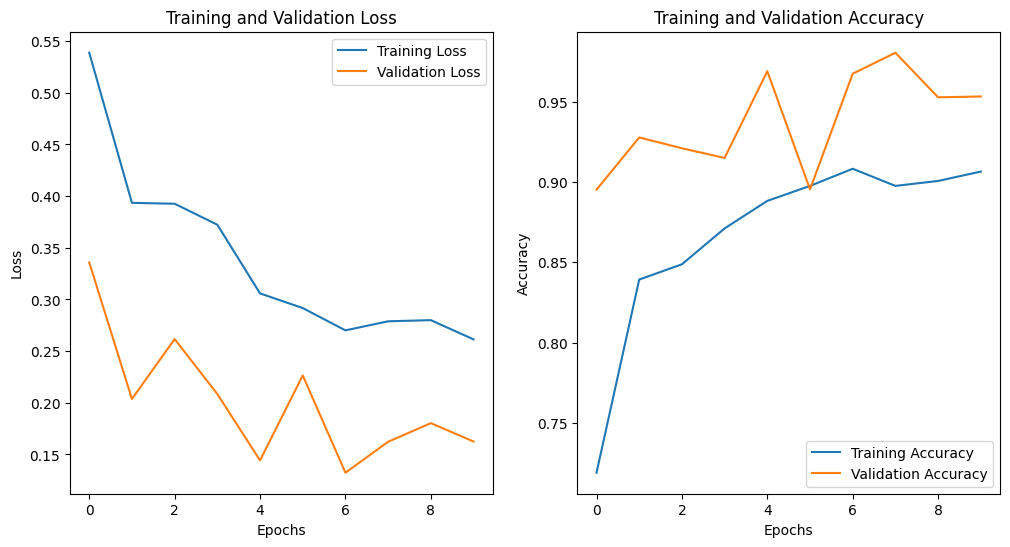

In [131]:
# Plot detailed training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [132]:
#Evaluate the model on the training data
# Evaluate the model
loss, accuracy = model.evaluate(X, Y)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 576s 38s/step - accuracy: 0.8624 - loss: 0.3619
Loss: 0.24323023855686188
Accuracy: 0.9176459312438965


In [133]:
# Load new test images
test_image_dir = '/content/drive/MyDrive/Sipakmed_Dataset (1)/Processed_with_edges_Test/Merged_Images'  # Directory containing the test images

# Load and preprocess images
test_images = load_images_from_folder(test_image_dir, color_mode='rgb')
preprocessed_test_images = [preprocess_image(img) for img in test_images]

# Convert to numpy array
X_test = np.array(preprocessed_test_images)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_324']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 540s 36s/step


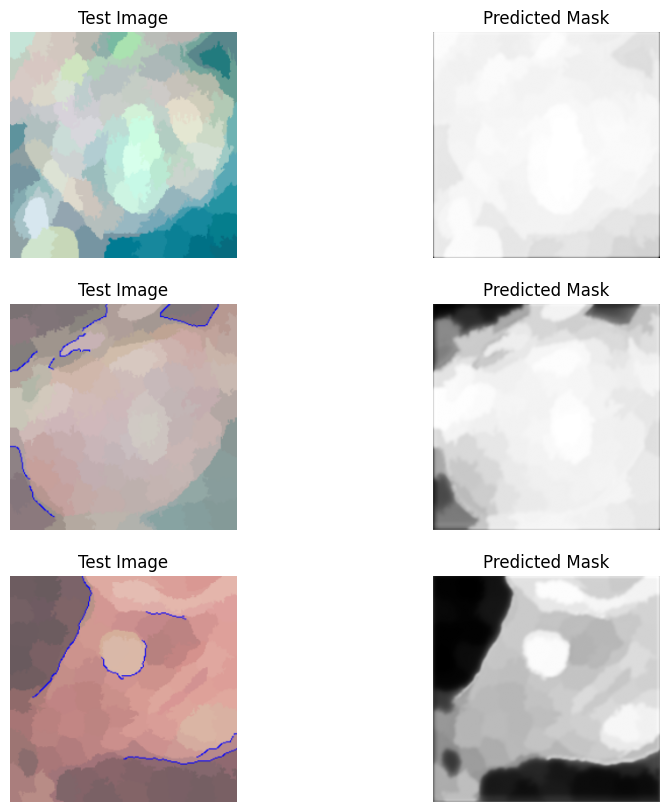

In [134]:
# Predict masks for test images
!pip install tensorflow # Install tensorflow if not already installed
from tensorflow.keras.preprocessing.image import array_to_img # Import array_to_img
import matplotlib.pyplot as plt

predicted_test_masks = model.predict(X_test)

#Visualizations of Predictions

def visualize_predictions(test_images, predicted_masks, num_samples=3):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(array_to_img(test_images[i]))  # Now array_to_img is defined
        plt.title("Test Image")
        plt.axis('off')

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(predicted_masks[i].squeeze(), cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')
    plt.show()

visualize_predictions(preprocessed_test_images, predicted_test_masks)

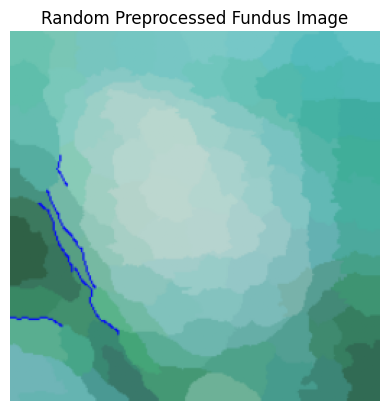

In [136]:
# Visualizing a Random Image
import matplotlib.pyplot as plt
import random # Import the random module

# Select a random image
random_index = random.randint(0, len(preprocessed_images) - 1)
random_image = preprocessed_images[random_index]

# Visualize the random image
plt.imshow(random_image)
plt.title("Random Preprocessed Fundus Image")
plt.axis('off')
plt.show()


In [137]:
# Function to display multiple random images
def display_random_images(images, n=5):
    if len(images) == 0:
        print("No images found in the directory.")
        return

    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        # Ensure random index is within the bounds of the images list
        random_index = random.randint(0, len(images) - 1)
        random_image = images[random_index]
        plt.imshow(random_image)
        plt.axis('off')
    plt.show()


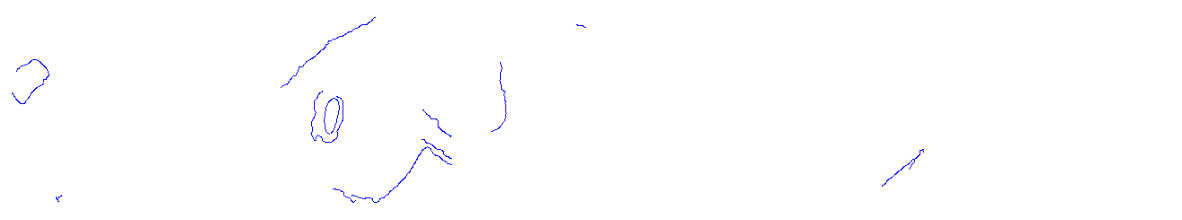

In [138]:
# Set the path to the directory containing the fundus images
image_dir = '/content/drive/MyDrive/Sipakmed_Dataset (1)/Processed_with_edges_Test/Merged_Images'  # Verify this path

# Load images, handle potential errors
images = load_images_from_folder(image_dir)

# Check if images were loaded
if len(images) > 0:
    display_random_images(images)
else:
    print("No images were loaded. Please check the image directory path.")

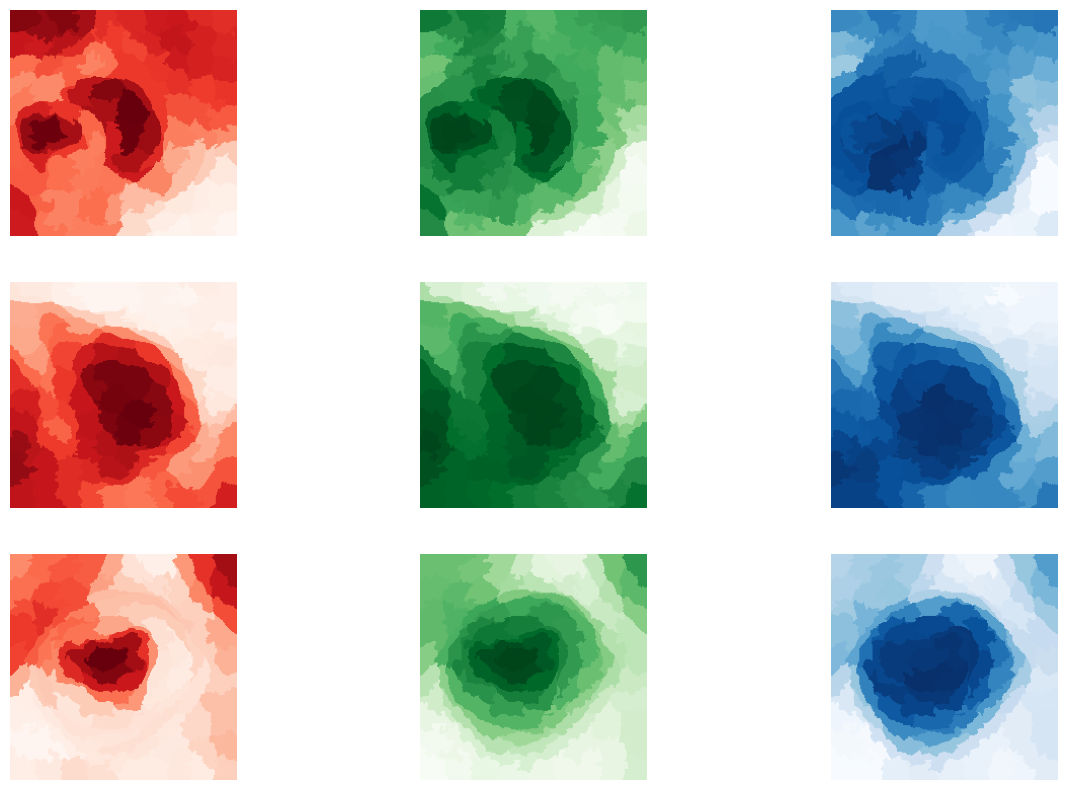

In [ ]:
#Displaying color channels separately
#Color Channels: Display the red, green, and blue channels of random images separately.
display_color_channels(images)

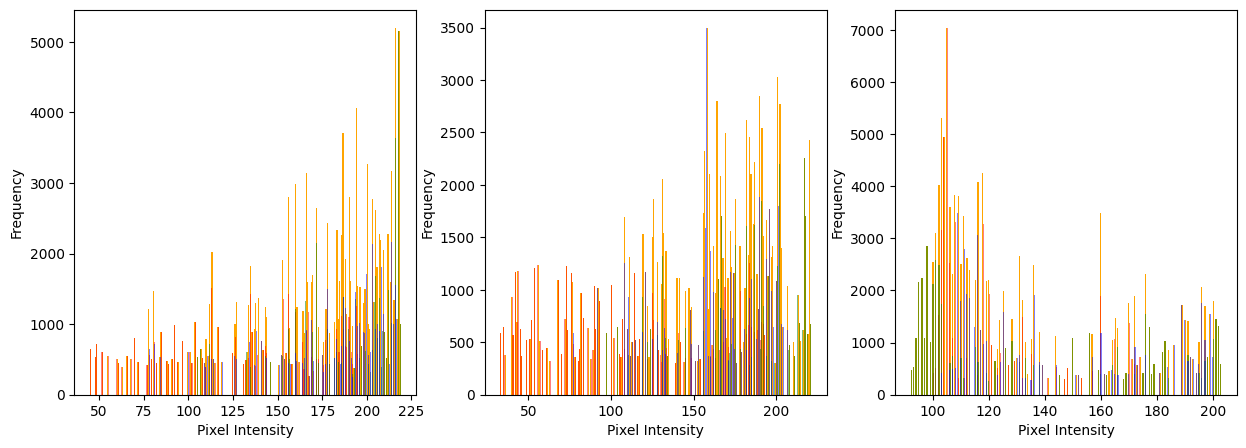

In [ ]:
# Display histograms of pixel intensities
#Histograms of Pixel Intensities: Showing the distribution of pixel intensities for random images, including separate histograms for each color channel.
display_histograms(images)

In [140]:
import matplotlib.pyplot as plt
import random

def display_histograms(images, n=3):  # Define display_histograms
    """
    Display histograms of pixel intensities for n random images.
    """

    if len(images) == 0:
        print("No images found in the directory.")
        return

    plt.figure(figsize=(15, 5 * n))  # Adjust figure size
    for i in range(n):
        # Ensure random index is within the bounds of the images list
        random_index = random.randint(0, len(images) - 1)
        random_image = images[random_index]

        plt.subplot(n, 2, i * 2 + 1)
        plt.imshow(random_image)
        plt.title(f"Random Image {i+1}")
        plt.axis('off')

        plt.subplot(n, 2, i * 2 + 2)
        plt.hist(random_image.ravel(), bins=256, range=(0, 1), density=True)  # Assuming normalized images
        plt.title(f"Pixel Intensity Histogram for Image {i+1}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")

    plt.tight_layout()  # Ensure plots don't overlap
    plt.show()

In [143]:
import matplotlib.pyplot as plt
import random

def display_color_channels(images, n=3):
    """
    Display red, green, and blue channels of random images separately.
    """

    if len(images) == 0:
        print("No images found in the directory.")
        return

    plt.figure(figsize=(15, 5 * n))
    for i in range(n):
        # Ensure random index is within the bounds of the images list
        random_index = random.randint(0, len(images) - 1)
        random_image = images[random_index]

        # Display the original image
        plt.subplot(n, 4, i * 4 + 1)  # 4 columns now: original + 3 channels
        plt.imshow(random_image)
        plt.title(f"Original Image {i+1}")
        plt.axis('off')

        # Display individual color channels
        for j, color in enumerate(['red', 'green', 'blue']):
            plt.subplot(n, 4, i * 4 + j + 2)
            channel = random_image[:, :, j]  # Extract the color channel
            plt.imshow(channel, cmap=color)  # Use colormap for visualization
            plt.title(f"{color.capitalize()} Channel")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

In [148]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_confusion_matrix(y_true, y_pred, threshold=0.5):
    """
    Compute the confusion matrix for a segmentation model at the pixel level.

    Parameters:
    - y_true: Ground truth masks (H, W) or (batch, H, W)
    - y_pred: Model predicted masks (H, W) or (batch, H, W)
    - threshold: Threshold to binarize predictions (default = 0.5)

    Returns:
    - Confusion matrix (TN, FP, FN, TP)
    """
    # Flatten the arrays
    y_true_flat = y_true.flatten()
    y_pred_flat = (y_pred.flatten() > threshold).astype(int)  # Binarize predictions

    # Compute confusion matrix
    cm = confusion_matrix(y_true_flat, y_pred_flat).astype(np.int32)

    return cm


In [150]:
# Assuming you have X and Y as your full dataset of images and masks
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# ... (rest of your code) ...

# Select a test image and corresponding mask
idx = np.random.randint(len(Y_test))
y_true_sample = Y_test[idx].squeeze()  # Remove channel dimension
y_pred_sample = model.predict(np.expand_dims(X_test[idx], axis=0)).squeeze()

# ... (rest of your code to compute and display confusion matrix) ...

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


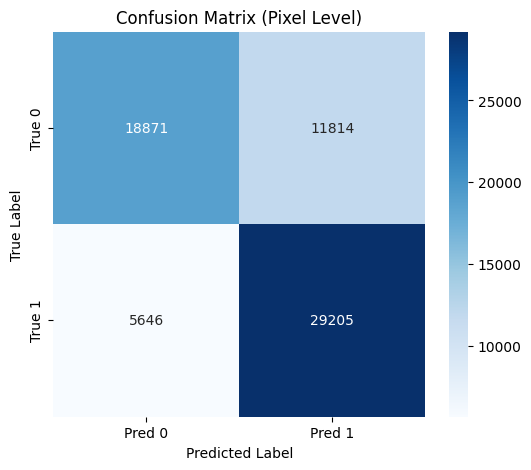

True Negatives: 18871, False Positives: 11814, False Negatives: 5646, True Positives: 29205


In [151]:
# Select a test image and corresponding mask
idx = np.random.randint(len(Y_test))
y_true_sample = Y_test[idx].squeeze()  # Remove channel dimension
y_pred_sample = model.predict(np.expand_dims(X_test[idx], axis=0)).squeeze()

# Compute confusion matrix
cm = compute_confusion_matrix(y_true_sample, y_pred_sample)

# Display the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Pixel Level)")
plt.show()

# Print values
TN, FP, FN, TP = cm.ravel()
print(f"True Negatives: {TN}, False Positives: {FP}, False Negatives: {FN}, True Positives: {TP}")


In [153]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load trained model, providing the correct path
model = tf.keras.models.load_model('/content/drive/MyDrive/cervical-models/unet_model.h5')

In [154]:
def generate_gradcam(model, image, layer_name="conv5_block3_out"):
    """
    Generate Grad-CAM heatmap for a given image and model layer.

    Parameters:
    - model: Trained U-Net model
    - image: Input image (H, W, C)
    - layer_name: Layer to extract gradients from

    Returns:
    - Heatmap overlayed on the original image
    """
    # Expand dimensions for batch size
    img_tensor = np.expand_dims(image, axis=0)

    # Define a new model that maps input to chosen layer and output
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    # Compute gradient of predicted mask with respect to the chosen layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = tf.reduce_mean(predictions)

    grads = tape.gradient(loss, conv_outputs)

    # Compute importance weights
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute weighted activation map
    cam = np.dot(conv_outputs[0], weights.numpy().reshape(-1, 1))

    # Normalize Grad-CAM heatmap
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)

    # Resize to match original image size
    cam = cv2.resize(cam, (image.shape[1], image.shape[0]))

    # Convert to heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)

    # Overlay heatmap on image
    overlay = cv2.addWeighted(image, 0.6, heatmap, 0.4, 0)

    return overlay, cam


In [158]:
def generate_gradcam(model, image, layer_name="conv2d_91"): # Changed layer_name to "conv2d_91"
    """
    Generate Grad-CAM heatmap for a given image and model layer.

    Parameters:
    - model: Trained U-Net model
    - image: Input image (H, W, C)
    - layer_name: Layer to extract gradients from

    Returns:
    - Heatmap overlayed on the original image
    """
    # Expand dimensions for batch size
    img_tensor = np.expand_dims(image, axis=0)

    # Define a new model that maps input to chosen layer and output
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    # Compute gradient of predicted mask with respect to the chosen layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = tf.reduce_mean(predictions)

    grads = tape.gradient(loss, conv_outputs)

    # Compute importance weights
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute weighted activation map
    cam = np.dot(conv_outputs[0], weights.numpy().reshape(-1, 1))

    # Normalize Grad-CAM heatmap
    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam)

    # Resize to match original image size
    cam = cv2.resize(cam, (image.shape[1], image.shape[0]))

    # Convert to heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)

    # Overlay heatmap on image
    # Convert image to uint8 before overlaying
    image = np.uint8(image * 255)  # Convert to uint8 with scaling
    overlay = cv2.addWeighted(image, 0.6, heatmap, 0.4, 0)

    return overlay, cam

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_8']]
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


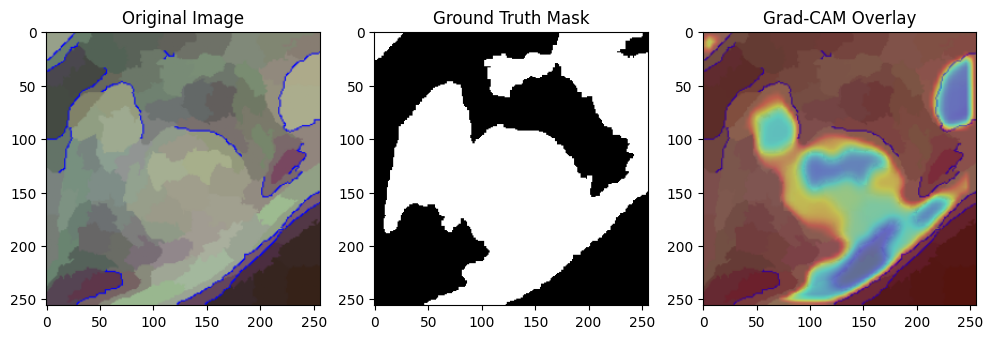

In [159]:
# Select a test image
sample_idx = 5  # Choose any index
sample_img = X_test[sample_idx]
sample_mask = Y_test[sample_idx]

# Generate Grad-CAM
overlay, heatmap = generate_gradcam(model, sample_img)

# Show Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(sample_img)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(sample_mask.squeeze(), cmap="gray")
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Grad-CAM Overlay")

plt.show()


In [160]:
def generate_gradcam(model, image, layer_name="conv5_block3_out", alpha=0.4):
    """
    Generate Grad-CAM heatmap for a given image and model layer.

    Parameters:
    - model: Trained U-Net model
    - image: Input image (H, W, C)
    - layer_name: Layer to extract gradients from
    - alpha: Blending factor for heatmap overlay

    Returns:
    - Overlayed image, Heatmap
    """
    img_tensor = np.expand_dims(image, axis=0)  # Expand batch dimension
    grad_model = tf.keras.models.Model([model.inputs],
                                       [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = tf.reduce_mean(predictions)  # Average over all output pixels

    grads = tape.gradient(loss, conv_outputs)
    weights = tf.reduce_mean(grads, axis=(0, 1, 2))  # Compute importance of each feature map

    cam = np.dot(conv_outputs[0], weights.numpy().reshape(-1, 1))  # Weighted sum of feature maps
    cam = np.maximum(cam, 0)  # ReLU to remove negative values
    cam = cam / np.max(cam)  # Normalize

    cam = cv2.resize(cam, (image.shape[1], image.shape[0]))  # Resize to match input image
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)  # Convert to heatmap

    overlay = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)  # Blend heatmap with original image
    return overlay, heatmap


In [162]:
# List of layers to test
layers_to_test = ["conv2d_91", "conv2d_90", "conv2d_89"] # Changed layer names

# ... (rest of your code) ...

In [166]:
def generate_gradcam(model, image, layer_name="conv2d_91", alpha=0.4):
    """
    Generate Grad-CAM heatmap for a given image and model layer.

    Parameters:
    - model: Trained U-Net model
    - image: Input image (H, W, C)
    - layer_name: Layer to extract gradients from
    - alpha: Blending factor for heatmap overlay

    Returns:
    - Overlayed image, Heatmap
    """
    # ... (other parts of your function) ...

    # Ensure both image and heatmap are of type uint8
    image = np.uint8(image * 255)

    # Applying colormap to cam to get heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)

    heatmap = np.uint8(heatmap) #Now converting heatmap to uint8


    overlay = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)  # Blend heatmap with original image
    return overlay, heatmap

In [168]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def generate_gradcam(model, image, layer_name, alpha=0.5):
    """
    Generates Grad-CAM heatmap for a given image and layer.

    Parameters:
    - model: Trained U-Net model.
    - image: Input image (H, W, C).
    - layer_name: Name of the layer to extract Grad-CAM from.
    - alpha: Blending factor for overlaying heatmap.

    Returns:
    - Overlayed image with heatmap.
    - Heatmap alone.
    """
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Get model outputs
    grad_model = Model(
        inputs=model.input,
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = tf.reduce_mean(predictions)  # Global average pooling over all pixels

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight feature maps with gradients
    conv_outputs = conv_outputs[0]  # Remove batch dimension
    cam = np.zeros(conv_outputs.shape[:2], dtype=np.float32)  # Initialize CAM

    for i in range(conv_outputs.shape[-1]):
        cam += pooled_grads[i] * conv_outputs[:, :, i]  # Weighted sum of feature maps

    # Normalize heatmap
    cam = np.maximum(cam, 0)  # ReLU (remove negative values)
    cam = cam / np.max(cam) if np.max(cam) != 0 else cam  # Normalize

    # Resize to match original image size
    heatmap = cv2.resize(cam, (image.shape[2], image.shape[1]))  # Match H, W
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Overlay heatmap on original image
    overlay = cv2.addWeighted(image[0], 1 - alpha, heatmap.astype(np.float32), alpha, 0)

    return overlay, heatmap


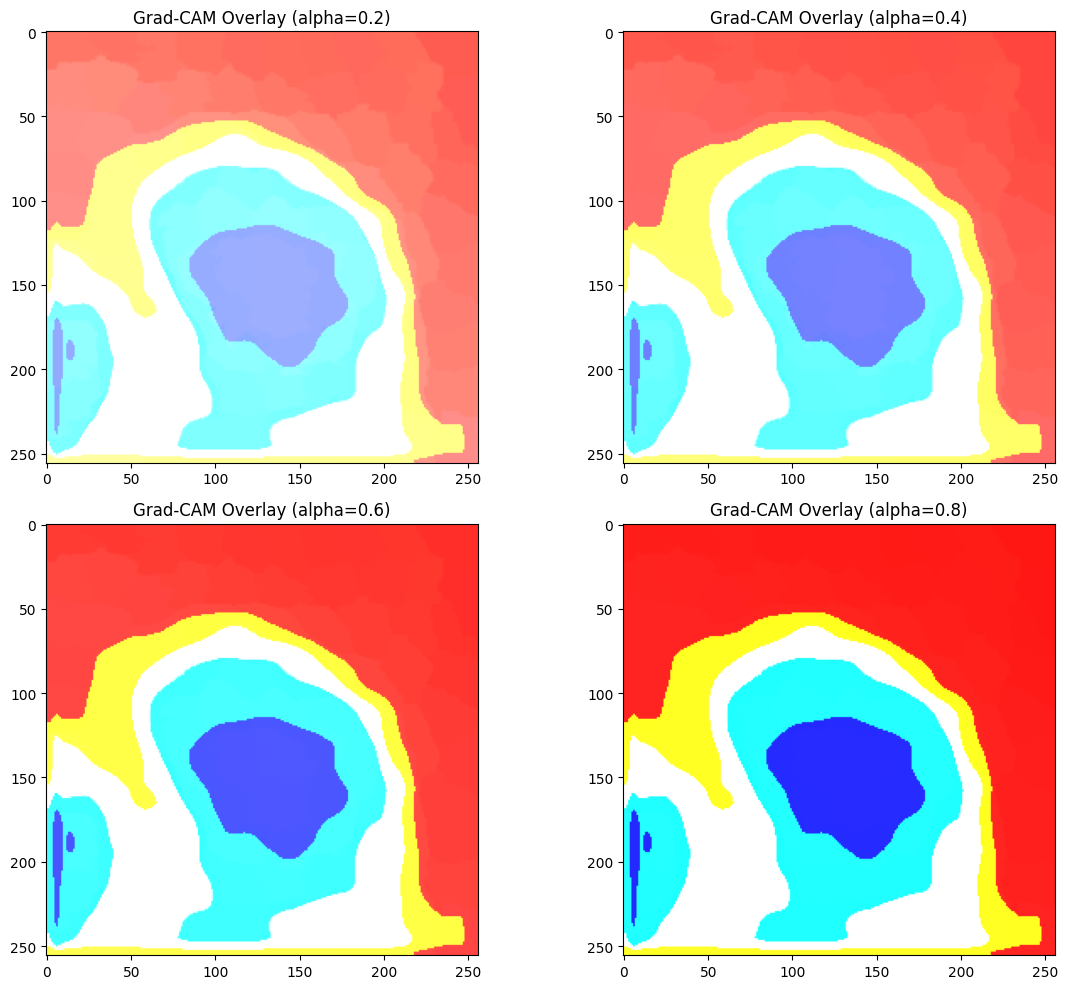

In [170]:
alpha_values = [0.2, 0.4, 0.6, 0.8]

plt.figure(figsize=(12, 10))

for i, alpha in enumerate(alpha_values):
    # Change layer_name to a valid layer from your model
    overlay, heatmap = generate_gradcam(model, sample_img, layer_name="conv2d_91", alpha=alpha)

    plt.subplot(2, 2, i + 1)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM Overlay (alpha={alpha})")

plt.tight_layout()
plt.show()

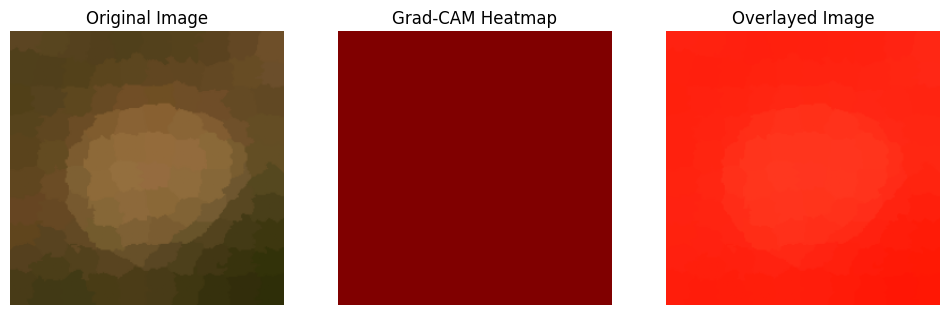

In [172]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to generate Grad-CAM
def generate_gradcam(model, image, layer_name, alpha=0.5):
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = tf.reduce_mean(predictions)

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]  # Remove batch dimension
    cam = np.zeros(conv_outputs.shape[:2], dtype=np.float32)

    for i in range(conv_outputs.shape[-1]):
        cam += pooled_grads[i] * conv_outputs[:, :, i]

    cam = np.maximum(cam, 0)
    cam = cam / np.max(cam) if np.max(cam) != 0 else cam

    heatmap = cv2.resize(cam, (image.shape[2], image.shape[1]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(image[0], 1 - alpha, heatmap.astype(np.float32), alpha, 0)

    return overlay, heatmap

# Pick a random image from the test set
idx = np.random.randint(len(X_test))
sample_img = X_test[idx]

# Select a convolutional layer for Grad-CAM
# Update with a valid layer name from the model summary
layer_to_visualize = "conv2d_91"  # Example: Using a valid layer name

# Generate Grad-CAM
overlayed_img, heatmap = generate_gradcam(model, sample_img, layer_name=layer_to_visualize)

# ... (rest of your code) ...
# Plot and save the image
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sample_img.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(heatmap, cmap="jet")
plt.title("Grad-CAM Heatmap")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(overlayed_img)
plt.title("Overlayed Image")
plt.axis("off")

plt.savefig("gradcam_result.png")  # Save the image
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 109s 35s/step


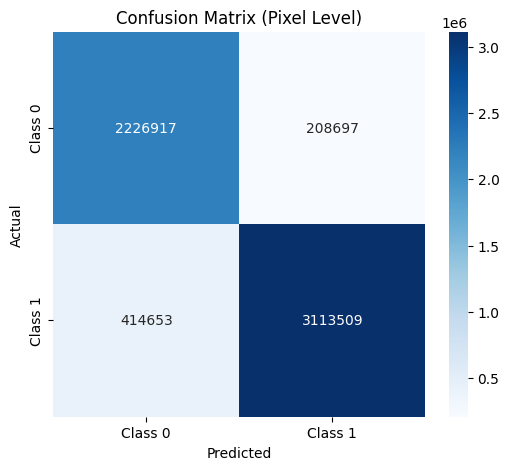

              precision    recall  f1-score   support

           0       0.84      0.91      0.88   2435614
           1       0.94      0.88      0.91   3528162

    accuracy                           0.90   5963776
   macro avg       0.89      0.90      0.89   5963776
weighted avg       0.90      0.90      0.90   5963776



In [175]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Get true labels and predicted labels
# Reshape to (num_samples, height * width) to get predictions for each pixel
y_true = Y_test.reshape(Y_test.shape[0], -1)
y_pred = model.predict(X_test).reshape(X_test.shape[0], -1)

# Threshold predictions to get binary labels (adjust threshold if needed)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
y_true_binary = (y_true > threshold).astype(int)

# Now you can calculate the confusion matrix for each pixel
cm = confusion_matrix(y_true_binary.flatten(), y_pred_binary.flatten()) # Flatten for confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Pixel Level)")
plt.show()

# Print classification report
print(classification_report(y_true_binary.flatten(), y_pred_binary.flatten())) # Flatten for classification_report

In [ ]:
def iou_score(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    return np.sum(intersection) / np.sum(union)

# Generate predictions for masks
y_pred_masks = model.predict(X_test)
y_pred_masks = (y_pred_masks > 0.5).astype(np.uint8)  # Convert to binary mask

# Compute IoU for the dataset
# Changed 'y_test' to 'Y_test'
iou_scores = [iou_score(y_true[i], y_pred_masks[i]) for i in range(len(Y_test))]
print(f"Mean IoU Score: {np.mean(iou_scores):.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 108s 34s/step


In [ ]:
#Analyze Layer-Wise Contributions
layers_to_test = ["conv2d_5", "conv2d_10", "conv2d_15", "conv2d_23"]  # Change based on your model

plt.figure(figsize=(15, 6))
for i, layer in enumerate(layers_to_test):
    overlay, heatmap = generate_gradcam(model, sample_img, layer_name=layer)

    plt.subplot(1, len(layers_to_test), i+1)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM at {layer}")
    plt.axis("off")

plt.show()


In [ ]:
#Superimpose Heatmaps on Original & Mask Images
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(sample_img.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Grad-CAM Overlay
plt.subplot(1, 3, 2)
overlay, _ = generate_gradcam(model, sample_img, layer_name="conv2d_23")
plt.imshow(overlay)
plt.title("Grad-CAM Heatmap")
plt.axis("off")

# Ground Truth Mask
plt.subplot(1, 3, 3)
plt.imshow(sample_mask.squeeze(), cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

plt.show()


In [ ]:
#Compute Overlap Between Grad-CAM and Ground Truth Mask
def gradcam_iou(gradcam, mask):
    intersection = np.logical_and(gradcam > 0.5, mask > 0.5)
    union = np.logical_or(gradcam > 0.5, mask > 0.5)
    return np.sum(intersection) / np.sum(union)

# Generate Grad-CAM heatmap
_, heatmap = generate_gradcam(model, sample_img, layer_name="conv2d_23")

# Compute IoU score
iou_score = gradcam_iou(heatmap, sample_mask)
print(f"Grad-CAM IoU Score: {iou_score:.4f}")


In [ ]:
#Compare Grad-CAM of Correct vs Incorrect Predictions
for i in range(5):  # Test on 5 random samples
    img = X_test[i]
    true_label = y_test[i]
    pred_label = np.argmax(model.predict(img.reshape(1, *img.shape)))

    overlay, _ = generate_gradcam(model, img, layer_name="conv2d_23")

    plt.figure(figsize=(8, 3))

    plt.subplot(1, 3, 1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM (Pred: {pred_label}, True: {true_label})")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(y_test[i].squeeze(), cmap="gray")
    plt.title("Ground Truth Mask")
    plt.axis("off")

    plt.show()


In [ ]:
#Generate Grad-CAM for Augmented Data
import albumentations as A

# Define an augmentation pipeline
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
])

# Apply augmentation
augmented = augment(image=sample_img.squeeze())["image"]
augmented = np.expand_dims(augmented, axis=[0, -1])  # Add batch & channel dimension

# Get Grad-CAM for augmented image
overlay_aug, _ = generate_gradcam(model, augmented, layer_name="conv2d_23")

plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(augmented.squeeze(), cmap="gray")
plt.title("Augmented Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(overlay_aug)
plt.title("Grad-CAM on Augmented")
plt.axis("off")

plt.show()


In [ ]:
#Compute Grad-CAM Activation Intensity
def gradcam_intensity(heatmap):
    return np.mean(heatmap)

intensities = [gradcam_intensity(generate_gradcam(model, img, "conv2d_23")[1]) for img in X_test]

plt.hist(intensities, bins=20, color="blue", alpha=0.7)
plt.xlabel("Grad-CAM Intensity")
plt.ylabel("Frequency")
plt.title("Distribution of Grad-CAM Activation Intensity")
plt.show()


Confusion Matrix:
 [[3 1]
 [1 5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6

    accuracy                           0.80        10
   macro avg       0.79      0.79      0.79        10
weighted avg       0.80      0.80      0.80        10



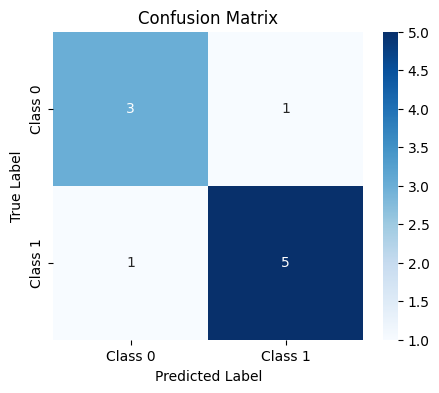

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Example: True labels (y_true) and Predicted labels (y_pred)
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1])  # Actual class labels
y_pred = np.array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1])  # Model predictions

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Print Confusion Matrix
print("Confusion Matrix:\n", cm)

# Compute Classification Metrics
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example: True labels and Predicted labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # Actual class labels
y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 1]  # Model predictions

# Compute Precision, Recall, and F1-score
precision = precision_score(y_true, y_pred, average='binary')  # 'binary' for binary classification
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Print the values
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Precision: 0.8333
Recall: 0.8333
F1-score: 0.8333
